<center><h1> CPE 4040 Spring 2024: Midterm Exam 2</h1></center>

## This is a two-part exam:
    Part 1: Problem solving
    Part 2: Semi-guided project for exploratory data analysis
### General guidelines:
 * Do your coding in a clean and logical manner.
 * __Make comments on your codes. Make insightful observations after the analysis.__
 * This is an individual assignment.
 * You are encouraged to do reseach, however, do your own work. __Do not copy-and-paste AI's or other people's work.__    

### Submission:
 * You have to submit this notebook file and the pdf file - remember to add your name in in the filenames. 
 * __Deadline: 11:59 pm, 4/10 (Wednesday)__

<h3> Import Python Tool Modules First</h3>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Part 1: Baby Name Dataset Analysis (45 Points)</h2>

#### In this dataset, baby names in the US from 2004 to 2014 are tablulated by gender, year, State, and number of counts.

### First step: import the dataset (in csv format) from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

<h3>Q1. Read the dataset and assign it to a dataframe called "baby". </h3>
<h4>Display the first 10 rows of the dataset. What are the column labels?</h4>

In [160]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv'

# Read the CSV file into a pandas DataFrame
baby = pd.read_csv(url)

# Display the first 10 rows
baby.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


<h3>Q2. The first two columns "Unnamed: 0" and "Id" are not useful.</h3>

### Please remove them and display the first 5 rows of the new dataframe.

In [161]:
# Remove the first two columns
baby_columns = baby.drop(df.columns[:2], axis=1)

# Display the default 5 rows with head()
baby_columns.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### Q3. According to this dataset, how many babies were born each year from 2004 to 2014? 

#### Show the numerical results and plot a `vertical bar chart` for the number of new-borns from 2004 to 2014. Properly label the x-axis and the y-axis.

In [162]:
# Filtering the dataframe for years 2004 to 2014
babies_born = baby[(baby['Year'] >= 2004) & (baby['Year'] <= 2014)]

# Group the babies by year they were born and finding the sum
babies_born_sum = babies_born.groupby('Year')['Count'].sum()

# Display the amount of babies in dataset born from 2004 - 2014
print(babies_born_sum)

Year
2004    3293984
2005    3305315
2006    3387737
2007    3412417
2008    3340318
2009    3232116
2010    3116548
2011    3079145
2012    3073858
2013    3066443
2014    3113611
Name: Count, dtype: int64


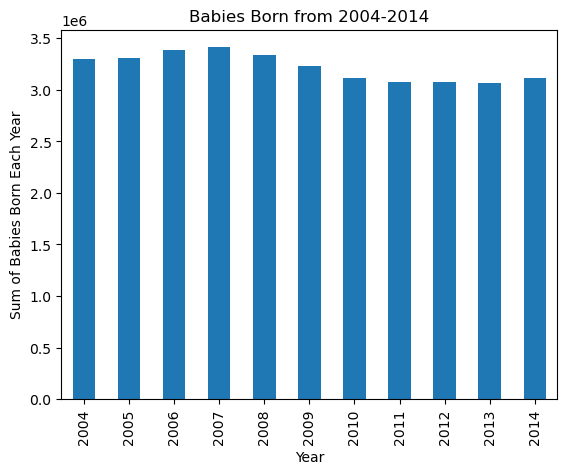

In [163]:
# Using the data from babies_born_sum to create a vertical bar chart
babies_born_sum.plot.bar()

# labeling and display chart
plt.title('Babies Born from 2004-2014')
plt.xlabel('Year')
plt.ylabel('Sum of Babies Born Each Year')
plt.show()

### Q4. How many boys (M) and girls (F) were born each year from 2004 to 2014? 
#### Show the numerical results and plot a `grouped bar chart`, one for boys and one for girls. Please add a legend.

In [164]:
# Grouping and then adding babies from 'baby' dataset by 'Year' and 'Gender'
boys = babies_born[babies_born['Gender'] == 'M'].groupby('Year')['Count'].sum()
girls = babies_born[babies_born['Gender'] == 'F'].groupby('Year')['Count'].sum()

# Creating a dataframe from variables Boys and Girls
baby_gender = pd.DataFrame({'Boys': boys, 'Girls': girls})

# Display numerical results
print(baby_gender)

         Boys    Girls
Year                  
2004  1770488  1523496
2005  1777150  1528165
2006  1822851  1564886
2007  1835769  1576648
2008  1795907  1544411
2009  1738944  1493172
2010  1677202  1439346
2011  1656606  1422539
2012  1651838  1422020
2013  1647092  1419351
2014  1667352  1446259


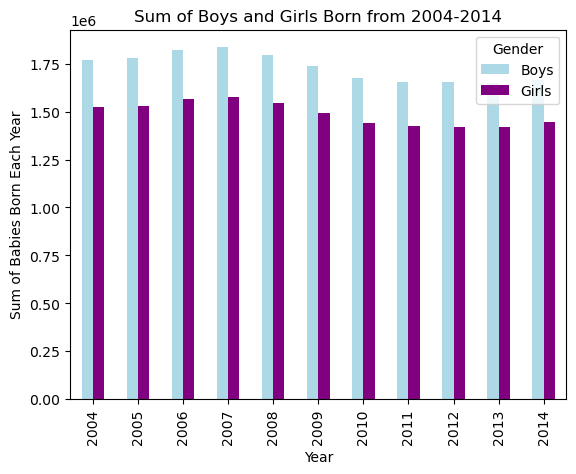

In [165]:
# Using the data from babies_born_sum to create a vertical bar chart
baby_gender.plot.bar(color = ['lightblue', 'purple'])

# Labeling and display chart
plt.title('Sum of Boys and Girls Born from 2004-2014')
plt.xlabel('Year')
plt.ylabel('Sum of Babies Born Each Year')
plt.legend(title='Gender')
plt.show()

### Q5. How many unique boy's names in the dataset? How many unique girl's names in the dataset?

In [166]:
# Count the number of unique boy names
unique_boys_names = baby[baby['Gender'] == 'M']['Name'].nunique()

# Count the number of unique girl names
unique_girls_names = baby[baby['Gender'] == 'F']['Name'].nunique()

# Display 
print("Number of unique boy's names:", unique_boys_names)
print("Number of unique girl's names:", unique_girls_names)

Number of unique boy's names: 8012
Number of unique girl's names: 10929


### Q6. What is the most popular boy's name from 2004 to 2014? 
### What is the most popular girl's name from 2004 to 2014?

In [167]:
# Group by name and gender, and sum the number of babies born for each name
name_counts = filtered_year.groupby(['Name', 'Gender'])['Count'].sum()

# Find the most popular boy's name
most_popular_boys_name = name_counts.loc[(slice(None), 'M')].idxmax()

# Find the most popular girl's name
most_popular_girls_name = name_counts.loc[(slice(None), 'F')].idxmax()

print("Most popular boy's name from 2004 to 2014:", most_popular_boys_name)
print("Most popular girl's name from 2004 to 2014:", most_popular_girls_name)

Most popular boy's name from 2004 to 2014: Jacob
Most popular girl's name from 2004 to 2014: Emma


### Q7. For the State of Texas, what was the most popular boy's name in 2012? How about girl's name?

In [168]:
# filtered the year to 2012 and checked the state as Texas
filtered_year2012 = babyname[(babyname['State'] == 'TX') & (babyname['Year'] == 2012)]

# Group by name and gender, and sum the number of babies born for each name
name_count = filtered_year2012.groupby(['Name', 'Gender'])['Count'].sum()

# Find the most popular boy's name in Texas in 2012
most_popular_boys_name = name_count.loc[(slice(None), 'M')].idxmax()

# Find the most popular girl's name in Texas in 2012
most_popular_girls_name = name_count.loc[(slice(None), 'F')].idxmax()

print("Most popular boy's name in Texas in 2012:", most_popular_boys_name)
print("Most popular girl's name in Texas in 2012:", most_popular_girls_name)

Most popular boy's name in Texas in 2012: Jacob
Most popular girl's name in Texas in 2012: Sophia


### Q8. Let's see how popular your name is in the US.

### How many babies in this dataset have the same first name as you?

In [169]:
# Filter the dataset for the name 'Anindita'
anindita_count = baby[baby['Name'] == 'Anindita']['Count'].sum()

# Babies with the same name as me 
print("Number of babies named Anindita in the dataset:", anindita_count)

# I'm unique~ Only one of me here

Number of babies named Anindita in the dataset: 0


### Q9. What are the top five states that had the most `percentage` increase in newborns between 2004 and 2014
### How about the bottom five states with the lowest `percentage` increase during the same period?


### *What are the top five states that had the highest increase in newborns between 2004 and 2014?
### *And what are the bottom five states with the lowest increase during the same period?

In [170]:
# Filter the dataset to include only the years from 2004 to 2014
filtered_year = babyname[(babyname['Year'] >= 2004) & (babyname['Year'] <= 2014)]

# Group by state and sum the number of babies born in 2004 and 2014
state_births = filtered_year.groupby(['State', 'Year'])['Count'].sum().unstack()

# Calculate the percentage increase in newborns for each state
state_births['Percentage Increase'] = ((state_births[2014] - state_births[2004]) / state_births[2004]) * 100

# Sort states based on percentage increase
sorted_states = state_births.sort_values(by='Percentage Increase', ascending=False)

# Get the top five states with the most percentage increase
top_five_states = sorted_states.head(5)

# Get the bottom five states with the lowest percentage increase
bottom_five_states = sorted_states.tail(5)

print("Top five states with the most percentage increase:") 
top_five_states


Top five states with the most percentage increase:


Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Percentage Increase
State,,,,,,,,,,,,
ND,5841,5936,5988,6109,6178,5950,6216,6236,6623,6992,7492,28.265708
AK,5588,5614,5719,5779,5931,5796,5832,5912,5631,5892,5955,6.567645
WA,63237,64022,66909,68368,69271,68223,65794,65973,66162,65201,67161,6.205228
TX,338179,341364,352121,359048,356351,352470,337544,329998,334705,339517,350378,3.607261
SC,38062,38604,41559,41846,42124,40179,38613,38398,38183,38533,39258,3.142242


In [171]:
print("\nBottom five states with the lowest percentage increase:")
bottom_five_states


Bottom five states with the lowest percentage increase:


Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Percentage Increase
State,,,,,,,,,,,,
NM,19000,19207,19761,19964,19612,18556,17425,16800,16710,15885,15737,-17.173684
ME,10029,9951,9777,9767,9207,8963,8577,8400,8364,8188,8145,-18.785522
NH,10315,10011,9954,9758,9514,9019,8895,8818,8403,8581,8279,-19.738245
VT,3854,3772,3562,3573,3338,3184,3089,3024,2934,3042,3060,-20.601972
RI,8968,8699,8371,8217,7730,7275,7011,6926,6883,6735,6684,-25.468332


### Q10: Popularity of the gender-neutral names: How many names are commonly used for both boys and girls? 

In [172]:
# Group by name and gender, and sum the number of babies born with each name for each gender
name_counts = df.groupby(['Name', 'Gender'])['Count'].sum().unstack()

# Filter out names where both genders have non-zero counts
gender_neutral_names = name_counts[(name_counts['M'] > 0) & (name_counts['F'] > 0)]

# Count the number of gender-neutral names
num_gender_neutral_names = len(gender_neutral_names)

print("Number of names commonly used for both boys and girls:", num_gender_neutral_names)

Number of names commonly used for both boys and girls: 1309


### Q11: What are the popular gender-neutral names? 
### Considering a name "popular", if it ranks among the top 200 for both genders within this period.

### For each identified name, provide the ranking for both genders. For example, "Riley: No. 47 for girls, No. 114 for boys)"

In [173]:
# Group by name and gender, and sum the number of babies born with each name for each gender
name_counts = baby.groupby(['Name', 'Gender'])['Count'].sum().unstack()

# Fill NaN values with 0
name_counts.fillna(0, inplace=True)

# Calculate the total count for each name (sum of counts for both genders)
name_counts['Total'] = name_counts['F'] + name_counts['M']

# Filter out names where both genders have non-zero counts (gender-neutral names)
gender_neutral_names = name_counts[(name_counts['M'] > 0) & (name_counts['F'] > 0)]

# Determine popular gender-neutral names (among top 200 for both genders)
popular_gender_neutral_names = gender_neutral_names.nlargest(200, columns=['Total'])

# Sort the names based on the 'Total' count
sorted_names = popular_gender_neutral_names.sort_values(by='Total', ascending=False)

# Assign rankings for each popular gender-neutral name
sorted_names['Rank_Girls'] = sorted_names['F'].rank(method='min', ascending=False)
sorted_names['Rank_Boys'] = sorted_names['M'].rank(method='min', ascending=False)

# Print the ranking for each popular gender-neutral name
for name, row in sorted_names.iterrows():
    rank_f = int(row['Rank_Girls'])
    rank_m = int(row['Rank_Boys'])
    print(f"{name}: No. {rank_f} for girls, No. {rank_m} for boys")

Jacob: No. 120 for girls, No. 1 for boys
Emma: No. 1 for girls, No. 136 for boys
Michael: No. 119 for girls, No. 2 for boys
Ethan: No. 127 for girls, No. 3 for boys
Isabella: No. 2 for girls, No. 142 for boys
William: No. 131 for girls, No. 4 for boys
Joshua: No. 129 for girls, No. 5 for boys
Sophia: No. 3 for girls, No. 160 for boys
Daniel: No. 125 for girls, No. 6 for boys
Emily: No. 4 for girls, No. 135 for boys
Olivia: No. 5 for girls, No. 139 for boys
Alexander: No. 124 for girls, No. 7 for boys
Matthew: No. 134 for girls, No. 8 for boys
Noah: No. 117 for girls, No. 9 for boys
Anthony: No. 146 for girls, No. 10 for boys
Andrew: No. 136 for girls, No. 11 for boys
Christopher: No. 126 for girls, No. 12 for boys
Joseph: No. 130 for girls, No. 13 for boys
David: No. 149 for girls, No. 14 for boys
Ava: No. 6 for girls, No. 144 for boys
Madison: No. 7 for girls, No. 131 for boys
Jayden: No. 87 for girls, No. 16 for boys
James: No. 132 for girls, No. 15 for boys
Logan: No. 90 for girls, 

## Part 2: The PIMA Diabetic Data Set (55 Points)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It consists of several diagnostic measurements from female patients at least 21 years old of Pima Indian heritage. It also shows the diagnosis on whether the patients have diabetes mellitus disease.

### The filename of the dataset is "diabetes.csv" that comes with this assignment.

The dataset contains the following features/columns:

 * __Pregnancies__: Number of times pregnant
 * __Glucose__: Plasma glucose concentration at 2 hour in an oral glucose tolerance test (mg/dL)
 * __BloodPressure__: Diastolic blood pressure (mm Hg)
 * __SkinThickness__: Triceps skin fold thickness (mm)
 * __Insulin__: 2-hour serum insulin level (mu U/ml)
 * __BMI__: Body mass index (weight in kg/(height in m)^2)
 * __DiabetesPedigreeFunction__: a function which scores likelihood of diabetes based on family history
 * __Age__: age of patients (years)
 * __Outcome__: class variable 0 or 1 indicating disease (0: non-diabetic, 1: diabetic)


## Part 2.1: Data Preparation and Cleaning (10 points)

#### Some typical tasks in this part include:
     1. Load the dataset in a data frame
     2. Examine the dataset attributes: index, columns, range of values etc.
     3. Handle missing and invalid data
     4. Identify and remove outliers

### Examine the dataset¶
**Q1: Load the dataset in a data frame and show the dataset attributes: index, columns, range of values etc.**

In [174]:
# Load the dataset from the CSV file
diabetes = pd.read_csv("diabetes.csv")

# Display the dataset attributes
print("Dataset Info:")
diabetes.info()  # Display basic information about the DataFrame

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [175]:
print("\nDataset Shape:")
print(diabetes.shape)  # Display the shape of the DataFrame (number of rows, number of columns)


Dataset Shape:
(768, 9)


In [176]:
print("\nDataset Columns:")
print(diabetes.columns)  # Display the column names of the DataFrame


Dataset Columns:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [177]:
print("\nDataset Index:")
print(diabetes.index)  # Display the index of the DataFrame


Dataset Index:
RangeIndex(start=0, stop=768, step=1)


In [178]:
print("\nDataset Head:")
diabetes.head()  # Display the first few rows of the DataFrame


Dataset Head:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [179]:
print("\nDataset Describe:")
diabetes.describe()  # Display summary statistics for numerical columns


Dataset Describe:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Handling missing data:
   **Q2: Are there missing values in the data set? Write a code to find out.**
   
   **Q3: You may notice some of the columns have unreasonable zero values (for example, Glucose and BMI). Identify those columns and replace the zeros with the `median value` of that column.**

### Missing value analysis

In [180]:
# Check for missing values
missing_values = diabetes.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Replacing Unreasonable Zeros

In [181]:
# Identify columns with unreasonable zero values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median value for each column
for column in columns_with_zeros:
    median_value = diabetes[column].median()
    df[column] = diabetes[column].replace(0, median_value)

# Display the first few rows of the modified DataFrame
print("Modified DataFrame:")
diabetes.head()

Modified DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Handling Outliers:
**Q4: Use boxplot to identify outliers for BMI data. Replace the outliers with the median BMI value** 

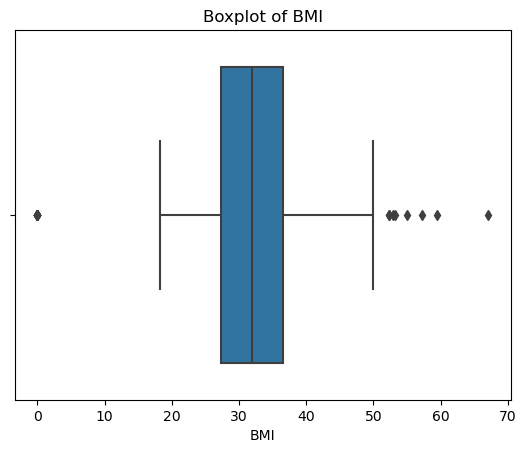

Modified DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [182]:
# Create a boxplot to visualize the distribution of BMI
sns.boxplot(x=diabetes['BMI'])

# Display the plot
plt.title('Boxplot of BMI')
plt.show()

# Calculate the median BMI value
median_bmi = df['BMI'].median()

# Identify outliers using the interquartile range (IQR) method
Q1 = diabetes['BMI'].quantile(0.25)
Q3 = diabetes['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median BMI value
diabetes.loc[(diabetes['BMI'] < lower_bound) | (diabetes['BMI'] > upper_bound), 'BMI'] = median_bmi

# Display the first few rows of the modified DataFrame
print("Modified DataFrame:")
diabetes.head()

## Part 2.2: Exploratory Data Analysis and Visualization (20 points)

You are expected to perform some basic __univariate__ and __bivariate__ data analysis and create **3 different charts**:

    1. Chart 1: Histograms for Glucose, BMI, and Age.
    2. Chart 2: Correlation matrix heatmap.
    3. Chart 3: Create your own chart (univariate or bivariate analysis).

Please make comments on the insights from the exploratory analysis.

### Chart 1 - Histograms

#### Create histograms for Glucose, BMI, and Age. 
    For the Age variable, your histogram should categorize individuals into decade-long bins (e.g., 0-9, 10-19, 20-29, etc.).

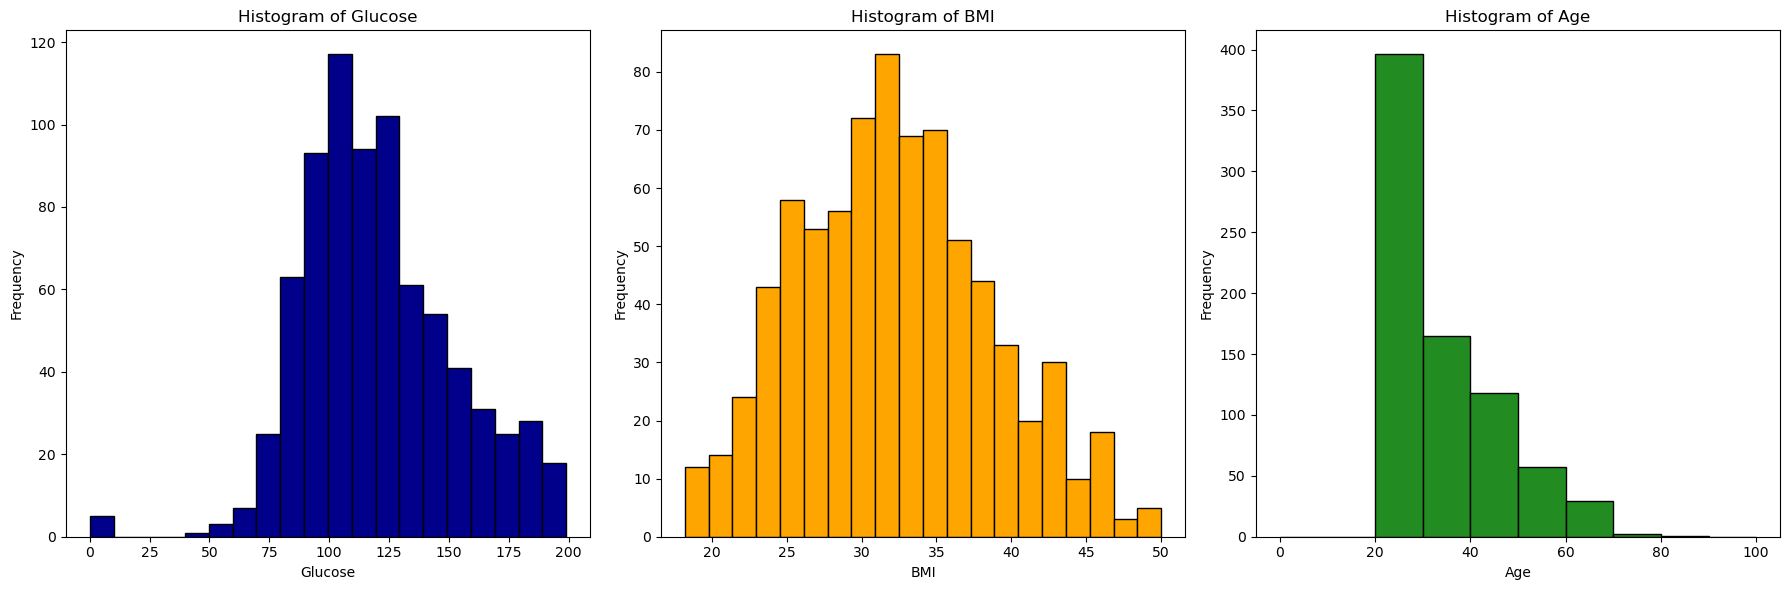

In [183]:
# Create histograms for Glucose, BMI, and Age
plt.figure(figsize=(18, 6))

# Histogram for Glucose
plt.subplot(1, 3, 1)
plt.hist(diabetes['Glucose'], bins=20, color='darkblue', edgecolor='black')
plt.title('Histogram of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')

# Histogram for BMI
plt.subplot(1, 3, 2)
plt.hist(diabetes['BMI'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Histogram for Age with decade-long bins (0-9, 10-19, 20-29, ...etc.)
plt.subplot(1, 3, 3)
plt.hist(diabetes['Age'], bins=range(0, 101, 10), color='forestgreen', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot layout to avoid overlap
plt.show()

### Comment:

In [184]:
# Looking at the histogram for glucose we can see an outlier thats not easily to see from just the data alone. 

### Chart 2 - Correlation Matrix Heatmap

    1. Calcuate the correlation matrix of the dataframe and plot the heatmap.
    2. Question: what are the three factors that have the highest correlation to the outcome? 

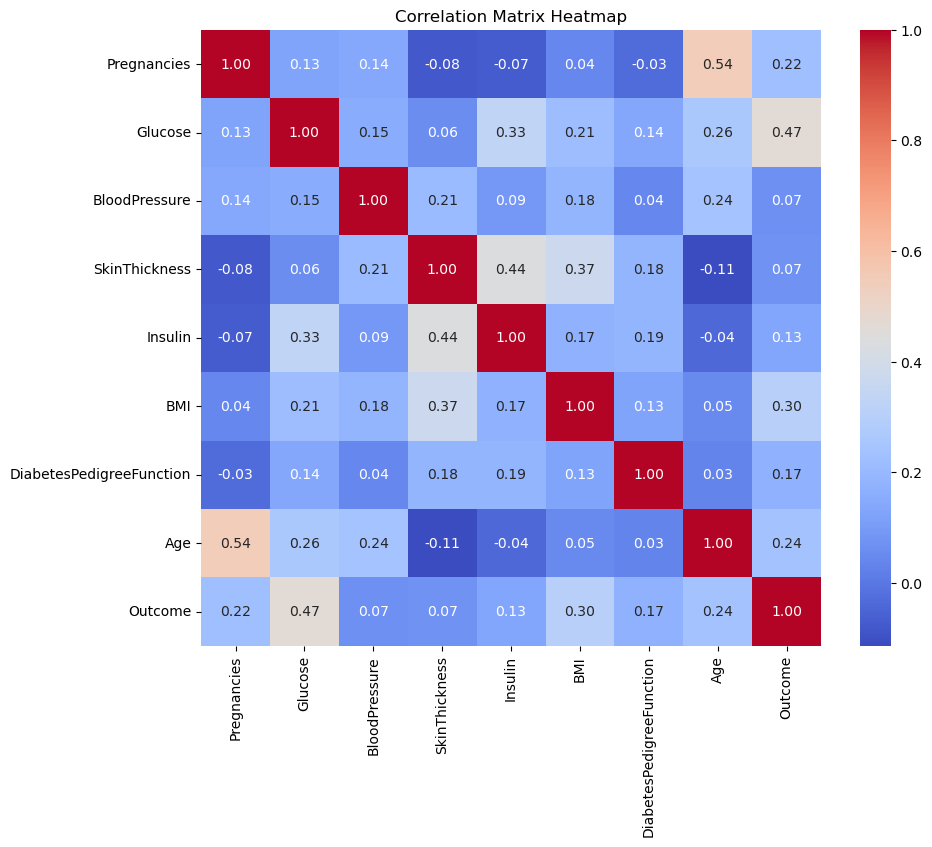

Factors with the highest correlation to the outcome:
Glucose    0.466581
BMI        0.300615
Age        0.238356
Name: Outcome, dtype: float64


In [185]:
# Calculate the correlation matrix
corr_matrix = diabetes.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Find the three factors with the highest correlation to the outcome
highest_corr_factors = corr_matrix['Outcome'].abs().sort_values(ascending=False)[1:4]

print("Factors with the highest correlation to the outcome:")
print(highest_corr_factors)

### Comment:

In [186]:
# Glucose is the only one with the highest correlation to outcome while the other hot spots were Age & Pregnancy and 
# Insulin & Skin Thickness

### Chart 3 - Create your own chart

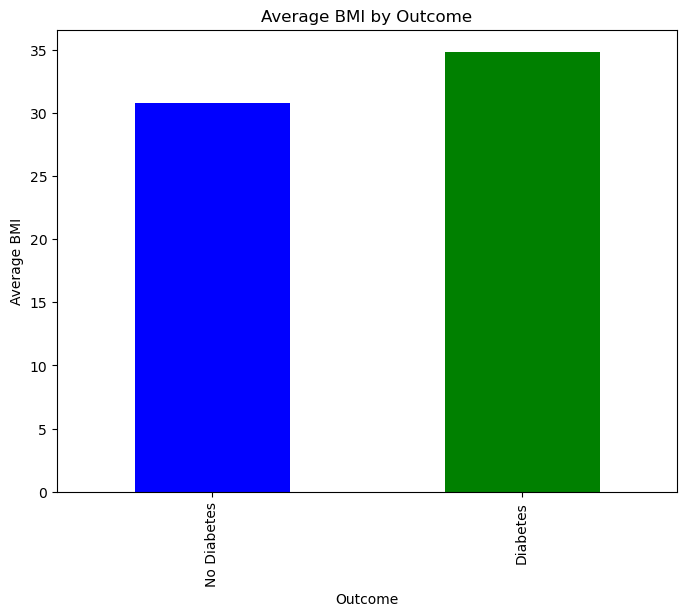

In [187]:
# Calculate the average BMI dependant on whether they have diabetes or not
avg_bmi_by_outcome = diabetes.groupby('Outcome')['BMI'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_bmi_by_outcome.plot(kind='bar', color=['blue', 'green'])
plt.title('Average BMI by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Average BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

### Comment:

In [188]:
# Comparing Average BMI's for whether there is diabetes present or not shows that there is a 
# slightly higher BMI for those with diabetes.

## Part 2.3: In-Depth Analysis (25 points)

__In this section, you will write codes to answer three questions about the dataset. The first two are given and you need to come up with your own question for the third one. For example, you may analyze how individual feature (column data) impacts the outcome of the diagnosis.__

### Q1. Do older women have higher chances of getting diabetes?  
#### You may need to create a bar chart with women in different age groups and show the percentage and/or total number of diabetic vs. non-diabetic in each group.

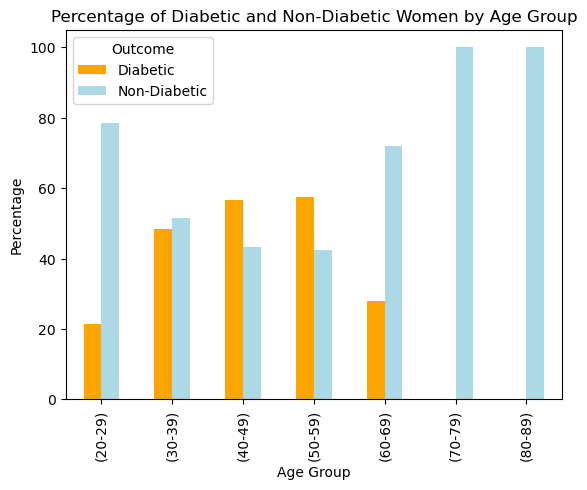

In [189]:
# Group the data by age groups (e.g., 20-29, 30-39, ...) using pandas here
age_groups = pd.cut(diabetes['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

# Calculate the total number of diabetic and non-diabetic women in each age group
grouped_data = diabetes.groupby([age_groups, 'Outcome']).size().unstack(fill_value=0)

#  Calculate the percentage of diabetic and non-diabetic women in each age group
grouped_data['Percentage Diabetic'] = (grouped_data[1] / (grouped_data[0] + grouped_data[1])) * 100
grouped_data['Percentage Non-Diabetic'] = (grouped_data[0] / (grouped_data[0] + grouped_data[1])) * 100

# Plotting the bar chart
grouped_data[['Percentage Diabetic', 'Percentage Non-Diabetic']].plot(kind='bar', color=['orange', 'lightblue'])
plt.title('Percentage of Diabetic and Non-Diabetic Women by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

#custom x-axis labels
plt.gca().set_xticklabels(['(20-29)', '(30-39)', '(40-49)', '(50-59)', '(60-69)', '(70-79)', '(80-89)']) 

# legend
plt.legend(title='Outcome', labels=['Diabetic', 'Non-Diabetic']) 
plt.show()

### Analysis

In [190]:
# this was tricky to set up between the two groups of women of different ages..  I'm shook that theres no diabetics past 69

### 2. Based on BMI data, how many of this group of patients are considered underweight, normal, overweight, obese (class I, II, and III)? 

  - underwieght: 0 < BMI < 18.5
  - normal: 18.5 =< BMI < <25
  - overweight: 25 =< BMI <30
  - class I: 30 =< BMI < 35
  - class II: 35 =< BMI <40
  - class III: BMI >= 40

Underweight: 4
Normal: 102
Overweight: 179
Class (I): 243
Class (II): 150
Class (III): 90


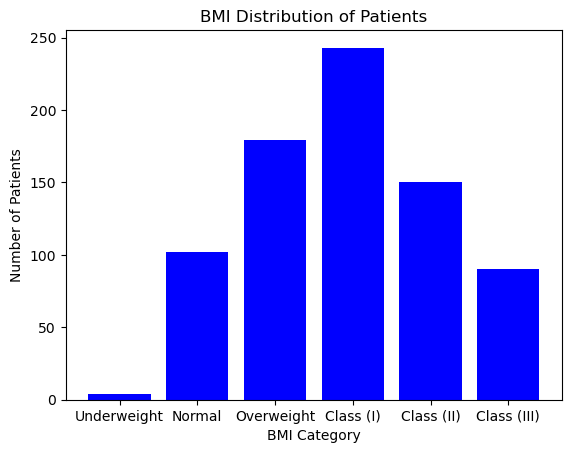

In [191]:
# Define the BMI categories in a dictionary
categories = {
    'Underweight': (0, 18.5),
    'Normal': (18.5, 25),
    'Overweight': (25, 30),
    'Class (I)': (30, 35),
    'Class (II)': (35, 40),
    'Class (III)': (40, float('inf'))
}

# Initialize counters for each category
category_counts = {category: 0 for category in categories}

# Classify patients based on BMI and count them for each category
for bmi in diabetes['BMI']:
    for category, (lower, upper) in categories.items():
        if lower <= bmi < upper:
            category_counts[category] += 1

# Displaying the counts for each category
for category, count in category_counts.items():
    print(f"{category}: {count}")

# Plotting the counts in a bar chart (optional)
plt.bar(category_counts.keys(), category_counts.values(), color='blue')
plt.title('BMI Distribution of Patients')
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')
plt.show()

### Analysis:

In [192]:
# larger numbers of patients with higher BMI's are mostly likely overweight and class 1 diabetics.

### 3. Propose and analyze your own question here.

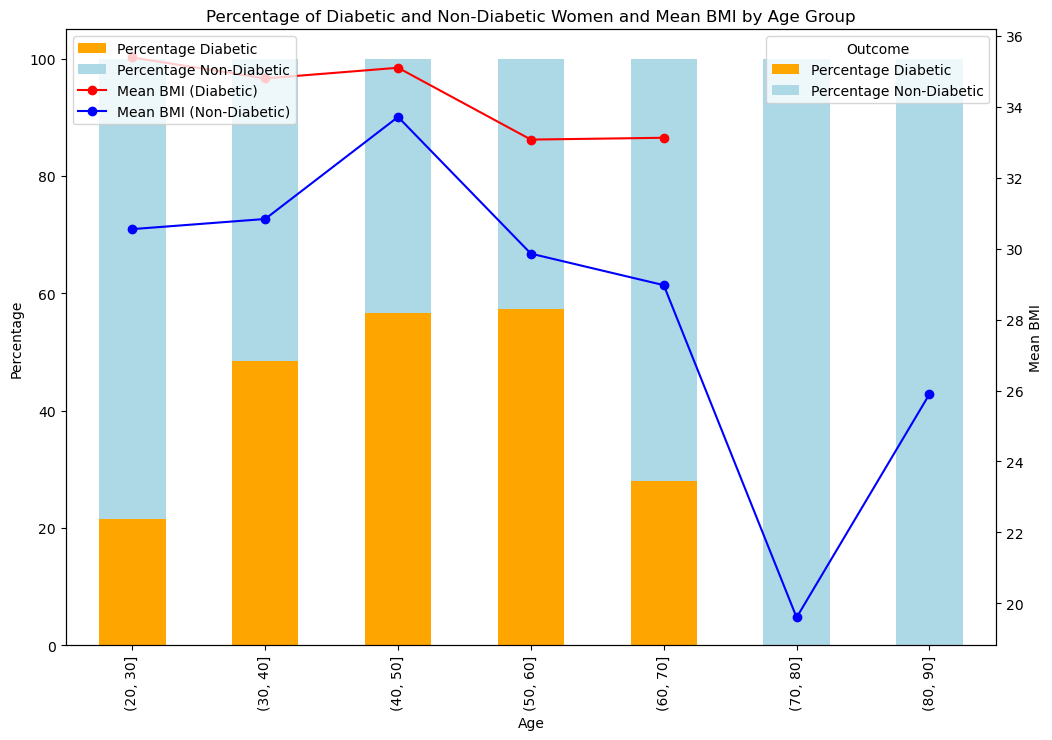

In [193]:
# Combining the previous two questions: What's the BMI distribution of women of different ages who 
# are diabetic vs non diabetic?

# Group the data by age groups (each bin is 10 years)
age_groups = pd.cut(diabetes['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

# Calculate the total number of diabetic and non-diabetic women in each age group (like before)
grouped_data = diabetes.groupby([age_groups, 'Outcome']).size().unstack(fill_value=0)

# Calculate the percentage of diabetic and non-diabetic women in each age group 
grouped_data['Percentage Diabetic'] = (grouped_data[1] / (grouped_data[0] + grouped_data[1])) * 100
grouped_data['Percentage Non-Diabetic'] = (grouped_data[0] / (grouped_data[0] + grouped_data[1])) * 100

# Calculate the mean BMI for diabetic and non-diabetic women in each age group
grouped_bmi = diabetes.groupby([age_groups, 'Outcome'])['BMI'].mean().unstack(fill_value=0)

# Adding BMI data to the grouped_data DataFrame
grouped_data['Mean BMI (Diabetic)'] = grouped_bmi[1]
grouped_data['Mean BMI (Non-Diabetic)'] = grouped_bmi[0]

# Plotting the bar chart with stacked bars for diabetic and non-diabetic percentages and overlaying a line plot for BMI
# This part was weird with the bars unstacked so I continued with stacked for a cleaner look
fig, ax1 = plt.subplots(figsize=(12, 8))

grouped_data[['Percentage Diabetic', 'Percentage Non-Diabetic']].plot(kind='bar', stacked=True, color=['orange', 'lightblue'], ax=ax1)
ax1.set_ylabel('Percentage')

# Customizing x-axis labels
ax1.set_xticklabels(['(20-29)', '(30-39)', '(40-49)', '(50-59)', '(60-69)', '(70-79)', '(80-89)'])

# Adding a second y-axis for mean BMI
ax2 = ax1.twinx()
grouped_data[['Mean BMI (Diabetic)', 'Mean BMI (Non-Diabetic)']].plot(kind='line', marker='o', linestyle='-', color=['red', 'blue'], ax=ax2)
ax2.set_ylabel('Mean BMI')

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Percentage of Diabetic and Non-Diabetic Women and Mean BMI by Age Group')
plt.xlabel('Age Group')
plt.show()


### Analysis:

In [194]:
# Combining the previous two questions: What's the BMI distribution of women of different ages who 
# are diabetic vs non diabetic?


# The mean BMI is consistently higher for diabetic female patients across the age groups (excluding past 71 because there
# are no records of diabetic women after that point). The mean BMI for non-diabetic women patients were particularly 
# high at age 40-50 regardless of being diabetic or not. 